# EDA by oXyut9943

In [96]:
import os
import re
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport

In [7]:
train_files = glob('../../data/inputs/csv_files/train/*.csv')
train_files.sort()
dict_train_files_depth = {'0': [], '1': [], '2': [], 'base': []}
for i, f in enumerate(train_files):
    file_name = os.path.basename(f)
    pattern = re.compile(r'train_[a-z_]+(\d+).*\.csv')
    match = pattern.match(file_name)
    if match is None:
        dict_train_files_depth['base'].append(f)
    else:
        depth = match.group(1)
        dict_train_files_depth[depth].append(f)

for k in dict_train_files_depth:
    for f in dict_train_files_depth[k]:
        print(k, os.path.basename(f))

0 train_static_0_0.csv
0 train_static_0_1.csv
0 train_static_cb_0.csv
1 train_applprev_1_0.csv
1 train_applprev_1_1.csv
1 train_credit_bureau_a_1_0.csv
1 train_credit_bureau_a_1_1.csv
1 train_credit_bureau_a_1_2.csv
1 train_credit_bureau_a_1_3.csv
1 train_credit_bureau_b_1.csv
1 train_debitcard_1.csv
1 train_deposit_1.csv
1 train_other_1.csv
1 train_person_1.csv
1 train_tax_registry_a_1.csv
1 train_tax_registry_b_1.csv
1 train_tax_registry_c_1.csv
2 train_applprev_2.csv
2 train_credit_bureau_a_2_0.csv
2 train_credit_bureau_a_2_1.csv
2 train_credit_bureau_a_2_10.csv
2 train_credit_bureau_a_2_2.csv
2 train_credit_bureau_a_2_3.csv
2 train_credit_bureau_a_2_4.csv
2 train_credit_bureau_a_2_5.csv
2 train_credit_bureau_a_2_6.csv
2 train_credit_bureau_a_2_7.csv
2 train_credit_bureau_a_2_8.csv
2 train_credit_bureau_a_2_9.csv
2 train_credit_bureau_b_2.csv
2 train_person_2.csv
base train_base.csv


In [8]:
feature_definition = pd.read_csv('../../data/inputs/feature_definitions.csv')
display(feature_definition)

,Variable,Description
0,actualdpd_943P,Days Past Due (DPD) of previous contract (actu...
1,actualdpdtolerance_344P,DPD of client with tolerance.
2,addres_district_368M,District of the person's address.
3,addres_role_871L,Role of person's address.
4,addres_zip_823M,Zip code of the address.
...,...,...
460,totinstallast1m_4525188A,Total amount of monthly instalments paid in th...
461,twobodfilling_608L,Type of application process.
462,type_25L,Contact type of a person.
463,typesuite_864L,Persons accompanying the client during the loa...


In [9]:
df_base_train = pd.read_csv('../../data/inputs/csv_files/train/train_base.csv')
df_base_test = pd.read_csv('../../data/inputs/csv_files/test/test_base.csv')

In [10]:
display(df_base_train)
display(df_base_test)

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0
1526655,2703451,2020-10-05,202010,91,0
1526656,2703452,2020-10-05,202010,91,0
1526657,2703453,2020-10-05,202010,91,0


,case_id,date_decision,MONTH,WEEK_NUM
0,57543,2020-10-06,202010,92
1,57549,2020-10-06,202010,92
2,57551,2020-10-06,202010,92
3,57552,2020-10-07,202010,92
4,57569,2020-10-06,202010,92
5,57630,2020-10-06,202010,92
6,57631,2020-10-06,202010,92
7,57632,2020-10-06,202010,92
8,57633,2020-10-06,202010,92
9,57634,2020-10-06,202010,92


- `case_id` - This is the unique identifier for each credit case. You'll need this ID to join relevant tables to the base table.
- `date_decision` - This refers to the date when a decision was made regarding the approval of the loan.
- `WEEK_NUM` - This is the week number used for aggregation. In the test sample, WEEK_NUM continues sequentially from the last training value of WEEK_NUM.
- `MONTH` - This column represents the month and is intended for aggregation purposes.
- `target` - This is the target value, determined after a certain period based on whether or not the client defaulted on the specific credit case (loan).
- `num_group1` - This is an indexing column used for the historical records of case_id in both depth=1 and depth=2 tables.
- `num_group2` - This is the second indexing column for depth=2 tables' historical records of case_id. The order of num_group1 and num_group2 is important and will be clarified in feature definitions.

array([[<Axes: title={'center': 'case_id'}>,
        <Axes: title={'center': 'MONTH'}>],
       [<Axes: title={'center': 'WEEK_NUM'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

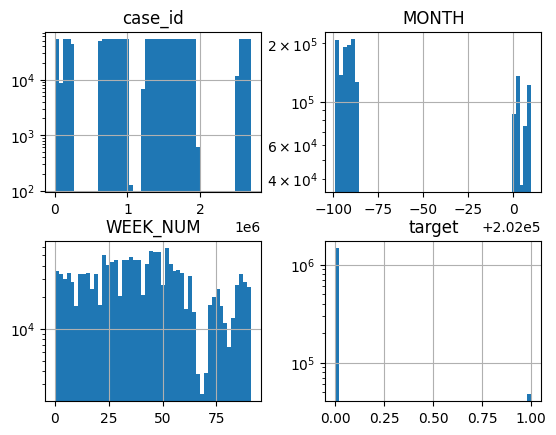

In [47]:
df_base_train.hist(bins=50, log=True)

In [56]:
df_static_0_train = pd.read_csv('../../data/inputs/csv_files/train/train_static_0_0.csv')
df_static_1_train = pd.read_csv('../../data/inputs/csv_files/train/train_static_0_1.csv')

/var/folders/0z/vv1q7cj15z3gt17m3sp5qcn40000gn/T/ipykernel_44466/3587826867.py:1: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df_static_0_train = pd.read_csv('../../data/inputs/csv_files/train/train_static_0_0.csv')
/var/folders/0z/vv1q7cj15z3gt17m3sp5qcn40000gn/T/ipykernel_44466/3587826867.py:2: DtypeWarning: Columns (20,45,46,56,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df_static_1_train = pd.read_csv('../../data/inputs/csv_files/train/train_static_0_1.csv')


In [57]:
display(df_static_0_train)
display(df_static_1_train)

,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,...,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
0,0,NaN,NaN,1917.6,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN,BO,NaN,NaN
1,1,NaN,NaN,3134.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN,BO,NaN,NaN
2,2,NaN,NaN,4937.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,36.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN,BO,AL,NaN
3,3,NaN,NaN,4643.6,0.0000,0.0,1.0,0.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,NaN,a55475b1,NaN,1.0,1.0,NaN,NaN,0.000,0.00,NaN,BO,AL,NaN
4,4,NaN,NaN,3390.2,0.0000,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.000,0.00,NaN,BO,AL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003752,2651088,0.0,117624.79,3045.0,4488.0000,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-1.0,-2.0,0.0,4901.0,NaN,0.0,58305.145,5617.6000,NaN,INSTANT,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.40260,0.0,0.00000,0.0,0.0,NaN,0.0,0.0,0.0,P178_112_160,NaN,0.0,0.0,44848.000,44848.000,44848.000,199664.67,8976.000,FO,NaN,2019-11-12
1003753,2651089,0.0,134887.40,1200.0,4382.8003,0.0,0.0,0.0,0.0,0.0,11.0,-2.0,-1.0,-1.0,0.0,6744.4,52592.0,0.0,45992.000,6118.8003,NaN,INSTANT,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.25714,0.0,0.05714,0.0,0.0,NaN,0.0,0.0,0.0,P173_115_85,0.0,0.0,10.0,39392.000,39392.000,39392.000,209840.00,8765.601,FO,NaN,2019-11-12
1003754,2651090,0.0,69186.62,6000.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,NaN,-16.0,0.0,6289.6,NaN,NaN,NaN,NaN,NaN,INSTANT,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.90000,0.0,0.00000,0.0,0.0,NaN,0.0,0.0,0.0,P178_112_160,0.0,0.0,0.0,0.000,0.000,0.000,76455.62,NaN,FO,NaN,2019-11-12
1003755,2651091,0.0,117331.00,11565.4,13781.2000,0.0,0.0,0.0,0.0,0.0,2.0,-6.0,0.0,-6.0,0.0,7333.2,NaN,0.0,89476.234,13781.2000,CA,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.78378,0.0,0.00000,0.0,0.0,24.0,0.0,0.0,0.0,P121_97_69,NaN,0.0,2.0,55084.402,55084.402,55084.402,168248.31,13781.200,FO,NaN,2019-11-30


,case_id,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,...,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
0,40626,NaN,NaN,1976.2001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,FO,AL,NaN
1,40704,NaN,NaN,3731.2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,FO,AL,NaN
2,40734,NaN,NaN,3731.2000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,NaN,a55475b1,NaN,1.0,1.0,NaN,NaN,0.0,0.00,NaN,FO,AL,NaN
3,40737,0.0,NaN,2362.0000,0.0,0.0,0.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,a55475b1,NaN,0.0,1.0,NaN,NaN,0.0,0.00,NaN,FO,AL,NaN
4,40766,NaN,NaN,1143.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,FO,AL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522897,2703450,0.0,176561.36,3675.4001,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-23.0,-43.0,-23.0,0.0,7356.8003,NaN,0.0,16392.496,6750.2,CA,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.91150,0.02655,0.03540,0.03540,0.0354,12.0,0.0,0.0,0.0,P123_39_170,0.0,0.0,8.0,0.0,0.0,0.0,428159.66,14346.319,FO,NaN,NaN
522898,2703451,0.0,301276.47,7088.6000,6191.6,0.0,0.0,5.0,0.0,0.0,5.0,-18.0,-12.0,-18.0,0.0,12553.2000,NaN,0.0,105129.310,15780.4,CA,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.94595,0.00000,0.01351,0.00000,0.0000,24.0,0.0,0.0,0.0,P162_18_172,NaN,0.0,3.0,68098.4,68098.4,68098.4,701247.30,40499.805,FO,NaN,NaN
522899,2703452,0.0,14232.40,7788.8003,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-12.0,NaN,-16.0,1.0,2662.4001,NaN,NaN,NaN,1500.6,CA,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.66667,0.00000,0.33333,0.11111,0.0000,11.0,0.0,0.0,0.0,P133_44_167,0.0,0.0,1.0,0.0,0.0,0.0,24002.00,NaN,BO,NaN,NaN
522900,2703453,0.0,197371.58,1195.4000,2827.2,0.0,0.0,36.0,0.0,0.0,9.0,-33.0,-64.0,-34.0,0.0,8212.6010,NaN,0.0,47943.062,9921.2,CA,NaN,0.0,0.0,0.0,...,False,OTHER,OTHER,NaN,0.69643,0.04348,0.20536,0.10811,0.0991,6.0,0.0,0.0,0.0,P123_6_84,0.0,0.0,4.0,46806.6,46806.6,46806.6,440145.30,5654.400,BO,NaN,NaN


In [65]:
len(pd.concat([df_static_0_train['case_id'], df_static_1_train['case_id']], axis=0).unique()) / len(df_base_train)

1.0

In [ ]:
df_static_1_train

In [66]:
df_base_static = pd.merge(
    df_base_train,
    pd.concat([df_static_0_train, df_static_1_train], axis=0),
    on='case_id', how='left'
)
display(df_base_static)

,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpdtolerance_344P,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgmaxdpdlast9m_3716943P,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,bankacctype_710L,...,opencred_647L,paytype1st_925L,paytype_783L,payvacationpostpone_4187118D,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P,previouscontdistrict_112M,price_1097A,sellerplacecnt_915L,sellerplacescnt_216L,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,typesuite_864L,validfrom_1069D
0,0,2019-01-03,201901,0,0,NaN,NaN,1917.6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,BO,NaN,NaN
1,1,2019-01-03,201901,0,0,NaN,NaN,3134.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,BO,NaN,NaN
2,2,2019-01-04,201901,0,0,NaN,NaN,4937.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,36.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,BO,AL,NaN
3,3,2019-01-03,201901,0,0,NaN,NaN,4643.6000,0.0,0.0,1.0,0.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,NaN,a55475b1,NaN,1.0,1.0,NaN,NaN,0.0,0.00,NaN,BO,AL,NaN
4,4,2019-01-04,201901,0,1,NaN,NaN,3390.2000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,NaN,a55475b1,NaN,0.0,0.0,NaN,NaN,0.0,0.00,NaN,BO,AL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0,0.0,176561.36,3675.4001,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-23.0,-43.0,-23.0,0.0,7356.8003,NaN,0.0,16392.496,6750.2,CA,...,False,OTHER,OTHER,NaN,0.91150,0.02655,0.03540,0.03540,0.0354,12.0,0.0,0.0,0.0,P123_39_170,0.0,0.0,8.0,0.0,0.0,0.0,428159.66,14346.319,FO,NaN,NaN
1526655,2703451,2020-10-05,202010,91,0,0.0,301276.47,7088.6000,6191.6,0.0,0.0,5.0,0.0,0.0,5.0,-18.0,-12.0,-18.0,0.0,12553.2000,NaN,0.0,105129.310,15780.4,CA,...,False,OTHER,OTHER,NaN,0.94595,0.00000,0.01351,0.00000,0.0000,24.0,0.0,0.0,0.0,P162_18_172,NaN,0.0,3.0,68098.4,68098.4,68098.4,701247.30,40499.805,FO,NaN,NaN
1526656,2703452,2020-10-05,202010,91,0,0.0,14232.40,7788.8003,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-12.0,NaN,-16.0,1.0,2662.4001,NaN,NaN,NaN,1500.6,CA,...,False,OTHER,OTHER,NaN,0.66667,0.00000,0.33333,0.11111,0.0000,11.0,0.0,0.0,0.0,P133_44_167,0.0,0.0,1.0,0.0,0.0,0.0,24002.00,NaN,BO,NaN,NaN
1526657,2703453,2020-10-05,202010,91,0,0.0,197371.58,1195.4000,2827.2,0.0,0.0,36.0,0.0,0.0,9.0,-33.0,-64.0,-34.0,0.0,8212.6010,NaN,0.0,47943.062,9921.2,CA,...,False,OTHER,OTHER,NaN,0.69643,0.04348,0.20536,0.10811,0.0991,6.0,0.0,0.0,0.0,P123_6_84,0.0,0.0,4.0,46806.6,46806.6,46806.6,440145.30,5654.400,BO,NaN,NaN


In [24]:
dict_categories = {'P':[], 'M':[], 'A':[], 'D':[], 'T':[], 'L':[]}

for c in dict_categories:
    for k in df_static_0_train.columns:
        if k[-1] == c:
            dict_categories[c].append(k)

for c in dict_categories:
    for k in dict_categories[c]:
        desc = feature_definition.query(f'Variable == "{k}"')['Description'].values[0]
        print(c, k, desc)

P actualdpdtolerance_344P DPD of client with tolerance.
P avgdbddpdlast24m_3658932P Average days past or before due of payment during the last 24 months.
P avgdbddpdlast3m_4187120P Average days past or before due of payment during the last 3 months.
P avgdbdtollast24m_4525197P Average days of payment before due date within the last 24 months (with tolerance).
P avgdpdtolclosure24_3658938P Average DPD (days past due) with tolerance within the past 24 months from the maximum closure date, assuming that the contract is finished. If the contract is ongoing, the calculation is based on the current date.
P avgmaxdpdlast9m_3716943P Average Days Past Due (DPD) of the client in last 9 months.
P maxdbddpdlast1m_3658939P Maximum number of days past due in the last month. A negative value indicates the number of days before the due date.
P maxdbddpdtollast12m_3658940P Maximum number of days past due in last 12 months. A negative value implies days before due date.
P maxdbddpdtollast6m_4187119P Max

In [67]:
print('P: Transform DPD (Days past due)', len(dict_categories['P']), 'columns')
display(df_base_static[dict_categories['P']])
print('M: Masking categories', len(dict_categories['M']), 'columns')
display(df_base_static[dict_categories['M']])
print('A: Transform amount', len(dict_categories['A']), 'columns')
display(df_base_static[dict_categories['A']])
print('D: Transform date', len(dict_categories['D']), 'columns')
display(df_base_static[dict_categories['D']])
print('T: Unspecified Transform', len(dict_categories['T']), 'columns')
display(df_base_static[dict_categories['T']])
print('L: Unspecified Transform', len(dict_categories['L']), 'columns')
display(df_base_static[dict_categories['L']])

P: Transform DPD (Days past due) 22 columns


,actualdpdtolerance_344P,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avgmaxdpdlast9m_3716943P,maxdbddpdlast1m_3658939P,maxdbddpdtollast12m_3658940P,maxdbddpdtollast6m_4187119P,maxdpdfrom6mto36m_3546853P,maxdpdinstlnum_3546846P,maxdpdlast12m_727P,maxdpdlast24m_143P,maxdpdlast3m_392P,maxdpdlast6m_474P,maxdpdlast9m_1059P,maxdpdtolerance_374P,mindbddpdlast24m_3658935P,mindbdtollast24m_4525191P,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,0.0,-23.0,-43.0,-23.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,-144.0,-144.0,0.0,0.0,0.0
1526655,0.0,-18.0,-12.0,-18.0,0.0,0.0,0.0,2.0,2.0,0.0,7.0,2.0,2.0,0.0,2.0,2.0,2.0,-92.0,-92.0,0.0,0.0,0.0
1526656,0.0,-12.0,NaN,-16.0,1.0,NaN,NaN,-27.0,NaN,4.0,5.0,0.0,4.0,0.0,0.0,0.0,4.0,-27.0,-55.0,0.0,0.0,0.0
1526657,0.0,-33.0,-64.0,-34.0,0.0,0.0,-66.0,0.0,-33.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,34.0,-68.0,-68.0,0.0,0.0,0.0


M: Masking categories 8 columns


,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M
0,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1
1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1
2,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1
3,a55475b1,a55475b1,P94_109_143,a55475b1,a55475b1,P94_109_143,a55475b1,a55475b1
4,a55475b1,a55475b1,P24_27_36,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1
...,...,...,...,...,...,...,...,...
1526654,P12_6_178,P142_50_170,a55475b1,a55475b1,a55475b1,P94_109_143,P94_109_143,P123_39_170
1526655,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,P162_18_172
1526656,P159_130_59,P75_90_70,P180_60_137,a55475b1,a55475b1,a55475b1,a55475b1,P133_44_167
1526657,a55475b1,a55475b1,a55475b1,P159_130_59,P174_113_42,a55475b1,a55475b1,P123_6_84


A: Transform amount 31 columns


,amtinstpaidbefduel24m_4187115A,annuity_780A,annuitynextmonth_57A,avginstallast24m_3658937A,avglnamtstart24m_4525187A,avgoutstandbalancel6m_4187114A,avgpmtlast12m_4525200A,credamount_770A,currdebt_22A,currdebtcredtyperange_828A,disbursedcredamount_1113A,downpmt_116A,inittransactionamount_650A,lastapprcredamount_781A,lastotherinc_902A,lastotherlnsexpense_631A,lastrejectcredamount_222A,maininc_215A,maxannuity_159A,maxannuity_4075009A,maxdebt4_972A,maxinstallast24m_3658928A,maxlnamtstart6m_4525199A,maxoutstandbalancel12m_4187113A,maxpmtlast3m_4525190A,price_1097A,sumoutstandtotal_3546847A,sumoutstandtotalest_4493215A,totaldebt_9A,totalsettled_863A,totinstallast1m_4525188A
0,NaN,1917.6000,0.0,NaN,NaN,NaN,NaN,30000.0,0.0,0.0,30000.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,NaN,3134.0000,0.0,NaN,NaN,NaN,NaN,19999.8,0.0,0.0,19999.800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,NaN,4937.0000,0.0,NaN,NaN,NaN,NaN,78000.0,0.0,0.0,78000.000,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
3,NaN,4643.6000,0.0,NaN,NaN,NaN,NaN,40000.0,0.0,0.0,40000.000,0.0,NaN,NaN,NaN,NaN,59999.8,NaN,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
4,NaN,3390.2000,0.0,NaN,NaN,NaN,NaN,44000.0,0.0,0.0,44000.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,176561.36,3675.4001,0.0,7356.8003,NaN,16392.496,6750.2,30000.0,0.0,0.0,30000.000,0.0,NaN,20020.0,NaN,NaN,150000.0,36000.0,75521.910,NaN,105019.79,46718.2000,49651.402,77533.760,14346.319,0.0,0.0,0.0,0.0,428159.66,14346.319
1526655,301276.47,7088.6000,6191.6,12553.2000,NaN,105129.310,15780.4,100000.0,68098.4,68098.4,40739.540,0.0,NaN,0.0,NaN,NaN,NaN,NaN,117251.600,NaN,202775.55,40499.8000,116813.400,250031.200,40499.805,NaN,68098.4,68098.4,68098.4,701247.30,40499.805
1526656,14232.40,7788.8003,0.0,2662.4001,NaN,NaN,1500.6,60000.0,0.0,0.0,60000.000,0.0,NaN,3998.0,NaN,NaN,NaN,24000.0,6600.000,NaN,17143.40,3243.4001,4182.000,0.000,NaN,0.0,0.0,0.0,0.0,24002.00,NaN
1526657,197371.58,1195.4000,2827.2,8212.6010,NaN,47943.062,9921.2,6000.0,46806.6,46806.6,6000.000,0.0,NaN,0.0,NaN,NaN,2198.0,NaN,163202.000,NaN,126780.00,88740.8050,94265.200,81604.600,2827.200,0.0,46806.6,46806.6,46806.6,440145.30,5654.400


D: Transform date 15 columns


,datefirstoffer_1144D,datelastinstal40dpd_247D,datelastunpaid_3546854D,dtlastpmtallstes_4499206D,firstclxcampaign_1125D,firstdatedue_489D,lastactivateddate_801D,lastapplicationdate_877D,lastapprdate_640D,lastdelinqdate_224D,lastrejectdate_50D,lastrepayingdate_696D,maxdpdinstldate_3546855D,payvacationpostpone_4187118D,validfrom_1069D
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-03,NaN,NaN,2013-04-03,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-07,NaN,NaN,2019-01-07,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,2013-02-19,NaN,2016-09-15,NaN,2016-05-09,2007-07-13,2019-10-16,2019-10-09,2019-10-09,2016-09-15,2017-11-30,NaN,2016-08-15,NaN,NaN
1526655,2016-03-01,NaN,2020-05-30,NaN,2016-03-01,2015-08-17,2019-10-07,2019-09-30,2019-09-30,2020-05-30,NaN,NaN,2020-05-30,NaN,NaN
1526656,NaN,NaN,2019-03-16,2019-10-21,NaN,2018-10-16,2019-08-23,2020-08-21,2019-08-19,2019-03-16,NaN,NaN,2019-02-16,NaN,NaN
1526657,2014-04-30,NaN,2018-01-15,NaN,2017-06-21,2013-07-29,2019-12-23,2019-12-18,2019-12-18,2018-01-15,2013-06-29,NaN,2015-08-15,NaN,NaN


T: Unspecified Transform 0 columns


""
0
1
2
3
4
...
1526654
1526655
1526656
1526657


L: Unspecified Transform 91 columns


,applicationcnt_361L,applications30d_658L,applicationscnt_1086L,applicationscnt_464L,applicationscnt_629L,applicationscnt_867L,bankacctype_710L,cardtype_51L,clientscnt12m_3712952L,clientscnt3m_3712950L,clientscnt6m_3712949L,clientscnt_100L,clientscnt_1022L,clientscnt_1071L,clientscnt_1130L,clientscnt_136L,clientscnt_157L,clientscnt_257L,clientscnt_304L,clientscnt_360L,clientscnt_493L,clientscnt_533L,clientscnt_887L,clientscnt_946L,cntincpaycont9m_3716944L,...,numinstpaidearlyest_4493214L,numinstpaidlastcontr_4325080L,numinstpaidlate1d_3546852L,numinstregularpaid_973L,numinstregularpaidest_4493210L,numinsttopaygr_769L,numinsttopaygrest_4493213L,numinstunpaidmax_3546851L,numinstunpaidmaxest_4493212L,numnotactivated_1143L,numpmtchanneldd_318L,numrejects9m_859L,opencred_647L,paytype1st_925L,paytype_783L,pctinstlsallpaidearl3d_427L,pctinstlsallpaidlat10d_839L,pctinstlsallpaidlate1d_3546856L,pctinstlsallpaidlate4d_3546849L,pctinstlsallpaidlate6d_3546844L,pmtnum_254L,sellerplacecnt_915L,sellerplacescnt_216L,twobodfilling_608L,typesuite_864L
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,BO,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,18.0,0.0,0.0,BO,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,36.0,0.0,0.0,BO,AL
3,0.0,1.0,0.0,2.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,12.0,1.0,1.0,BO,AL
4,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,False,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,24.0,0.0,0.0,BO,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,0.0,0.0,0.0,0.0,0.0,10.0,CA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,99.0,12.0,4.0,113.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,OTHER,OTHER,0.91150,0.02655,0.03540,0.03540,0.0354,12.0,0.0,8.0,FO,NaN
1526655,0.0,0.0,5.0,0.0,0.0,5.0,CA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,70.0,0.0,1.0,75.0,75.0,11.0,11.0,11.0,11.0,0.0,0.0,0.0,False,OTHER,OTHER,0.94595,0.00000,0.01351,0.00000,0.0000,24.0,0.0,3.0,FO,NaN
1526656,0.0,0.0,0.0,0.0,0.0,3.0,CA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,3.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,OTHER,OTHER,0.66667,0.00000,0.33333,0.11111,0.0000,11.0,0.0,1.0,BO,NaN
1526657,0.0,0.0,36.0,0.0,0.0,9.0,CA,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,7.0,...,61.0,13.0,23.0,115.0,119.0,17.0,17.0,17.0,17.0,0.0,0.0,0.0,False,OTHER,OTHER,0.69643,0.04348,0.20536,0.10811,0.0991,6.0,0.0,4.0,BO,NaN


## P: Transform DPD (Days past due)

In [100]:
display(df_base_static[dict_categories['P']].describe())
display(df_base_static[dict_categories['P']].corr().style.background_gradient(cmap='coolwarm'))

,actualdpdtolerance_344P,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avgmaxdpdlast9m_3716943P,maxdbddpdlast1m_3658939P,maxdbddpdtollast12m_3658940P,maxdbddpdtollast6m_4187119P,maxdpdfrom6mto36m_3546853P,maxdpdinstlnum_3546846P,maxdpdlast12m_727P,maxdpdlast24m_143P,maxdpdlast3m_392P,maxdpdlast6m_474P,maxdpdlast9m_1059P,maxdpdtolerance_374P,mindbddpdlast24m_3658935P,mindbdtollast24m_4525191P,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P
count,1.108481e+06,913457.000000,578415.000000,553832.000000,1.059484e+06,769653.000000,565706.000000,821155.000000,650383.000000,1.183284e+06,697257.000000,1.220640e+06,1.220640e+06,1.220640e+06,1.220640e+06,1.220640e+06,1.220640e+06,913457.000000,553832.000000,1.448133e+06,1.394771e+06,1.345537e+06
mean,7.923365e-02,30.098977,29.494342,30.759373,4.580929e+01,0.746392,45.046475,52.771362,48.514143,3.241556e+01,8.254667,1.660224e+01,2.637945e+01,6.660291e+00,1.006226e+01,1.342165e+01,5.343590e+01,-0.344706,-1.384097,1.613388e-02,8.049350e-03,3.052462e-02
std,1.120652e+01,317.684627,367.273913,322.467403,3.185406e+02,4.796508,464.771910,424.662692,434.620883,2.470706e+02,6.003638,1.926421e+02,2.310953e+02,1.377646e+02,1.587448e+02,1.769548e+02,2.847601e+02,303.534025,306.376376,1.259904e-01,8.935639e-02,1.720258e-01
min,0.000000e+00,-1220.000000,-908.000000,-1220.000000,0.000000e+00,0.000000,-1237.000000,-1199.000000,-1225.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1284.000000,-1284.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,-11.000000,-11.000000,-12.000000,0.000000e+00,0.000000,-9.000000,-1.000000,-2.000000,0.000000e+00,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-36.000000,-38.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,-5.000000,-4.000000,-5.000000,0.000000e+00,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-17.000000,-17.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,-1.000000,-1.000000,-2.000000,1.000000e+00,0.000000,0.000000,2.000000,1.000000,2.000000e+00,11.000000,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,-7.000000,-7.000000,0.000000e+00,0.000000e+00,0.000000e+00
max,4.206000e+03,4750.000000,4750.000000,4750.000000,4.750000e+03,240.000000,4804.000000,4804.000000,4804.000000,4.465000e+03,105.000000,4.629000e+03,4.629000e+03,4.629000e+03,4.629000e+03,4.629000e+03,4.629000e+03,4709.000000,4709.000000,1.000000e+00,1.000000e+00,1.000000e+00


,actualdpdtolerance_344P,avgdbddpdlast24m_3658932P,avgdbddpdlast3m_4187120P,avgdbdtollast24m_4525197P,avgdpdtolclosure24_3658938P,avgmaxdpdlast9m_3716943P,maxdbddpdlast1m_3658939P,maxdbddpdtollast12m_3658940P,maxdbddpdtollast6m_4187119P,maxdpdfrom6mto36m_3546853P,maxdpdinstlnum_3546846P,maxdpdlast12m_727P,maxdpdlast24m_143P,maxdpdlast3m_392P,maxdpdlast6m_474P,maxdpdlast9m_1059P,maxdpdtolerance_374P,mindbddpdlast24m_3658935P,mindbdtollast24m_4525191P,posfpd10lastmonth_333P,posfpd30lastmonth_3976960P,posfstqpd30lastmonth_3976962P
actualdpdtolerance_344P,1.000000,0.037020,0.040704,0.046855,0.033946,0.217941,0.032986,0.029845,0.032822,0.039771,-0.000394,0.054978,0.045629,0.077268,0.066917,0.059955,0.036541,0.038403,0.048975,-0.000174,0.003161,0.001439
avgdbddpdlast24m_3658932P,0.037020,1.000000,0.903663,0.999736,0.997212,0.033819,0.796366,0.835037,0.814664,0.640664,-0.012210,0.579251,0.661291,0.412369,0.487335,0.538349,0.599066,0.944306,0.937846,0.000750,0.000992,0.002785
avgdbddpdlast3m_4187120P,0.040704,0.903663,1.000000,0.891753,0.901954,0.042346,0.929705,0.910648,0.928434,0.341758,-0.023549,0.414243,0.365211,0.463694,0.453756,0.431892,0.313334,0.803515,0.787653,0.000405,0.000775,0.002336
avgdbdtollast24m_4525197P,0.046855,0.999736,0.891753,1.000000,0.997638,0.030437,0.779411,0.824454,0.802626,0.644616,-0.016077,0.582853,0.669683,0.399552,0.476506,0.536424,0.597686,0.938889,0.938795,-0.000246,-0.000229,0.002309
avgdpdtolclosure24_3658938P,0.033946,0.997212,0.901954,0.997638,1.000000,0.024403,0.794432,0.834207,0.813984,0.610799,-0.014497,0.528069,0.598368,0.378287,0.446107,0.491664,0.664749,0.938939,0.933056,0.001361,0.001027,0.002441
avgmaxdpdlast9m_3716943P,0.217941,0.033819,0.042346,0.030437,0.024403,1.000000,0.031338,0.034669,0.034946,0.029884,0.048691,0.070118,0.053995,0.068835,0.089218,0.079831,0.042409,0.033706,0.032329,0.010008,0.007056,0.010402
maxdbddpdlast1m_3658939P,0.032986,0.796366,0.929705,0.779411,0.794432,0.031338,1.000000,0.975257,0.991777,0.267905,-0.025063,0.327639,0.287425,0.372085,0.362281,0.343087,0.243627,0.646404,0.623884,0.001244,0.002789,0.003209
maxdbddpdtollast12m_3658940P,0.029845,0.835037,0.910648,0.824454,0.834207,0.034669,0.975257,1.000000,0.981277,0.479442,-0.015644,0.547394,0.500154,0.390514,0.450184,0.502373,0.443801,0.692059,0.673750,0.001398,0.002398,0.003938
maxdbddpdtollast6m_4187119P,0.032822,0.814664,0.928434,0.802626,0.813984,0.034946,0.991777,0.981277,1.000000,0.370612,-0.021700,0.439661,0.392630,0.410052,0.474885,0.456106,0.340489,0.674216,0.658446,0.001219,0.001579,0.003432
maxdpdfrom6mto36m_3546853P,0.039771,0.640664,0.341758,0.644616,0.610799,0.029884,0.267905,0.479442,0.370612,1.000000,0.017608,0.766884,0.930833,0.536982,0.623061,0.700350,0.857545,0.578638,0.569296,0.001453,0.000378,0.003093


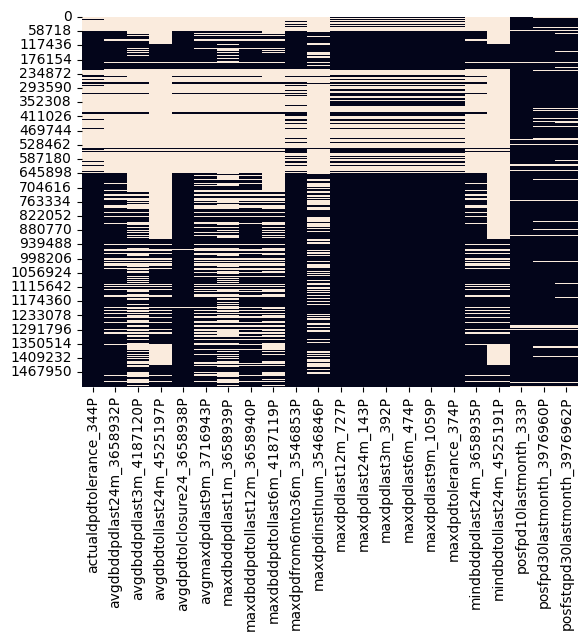

In [101]:
sns.heatmap(df_base_static[dict_categories['P']].isnull(), cbar=False)
plt.show()

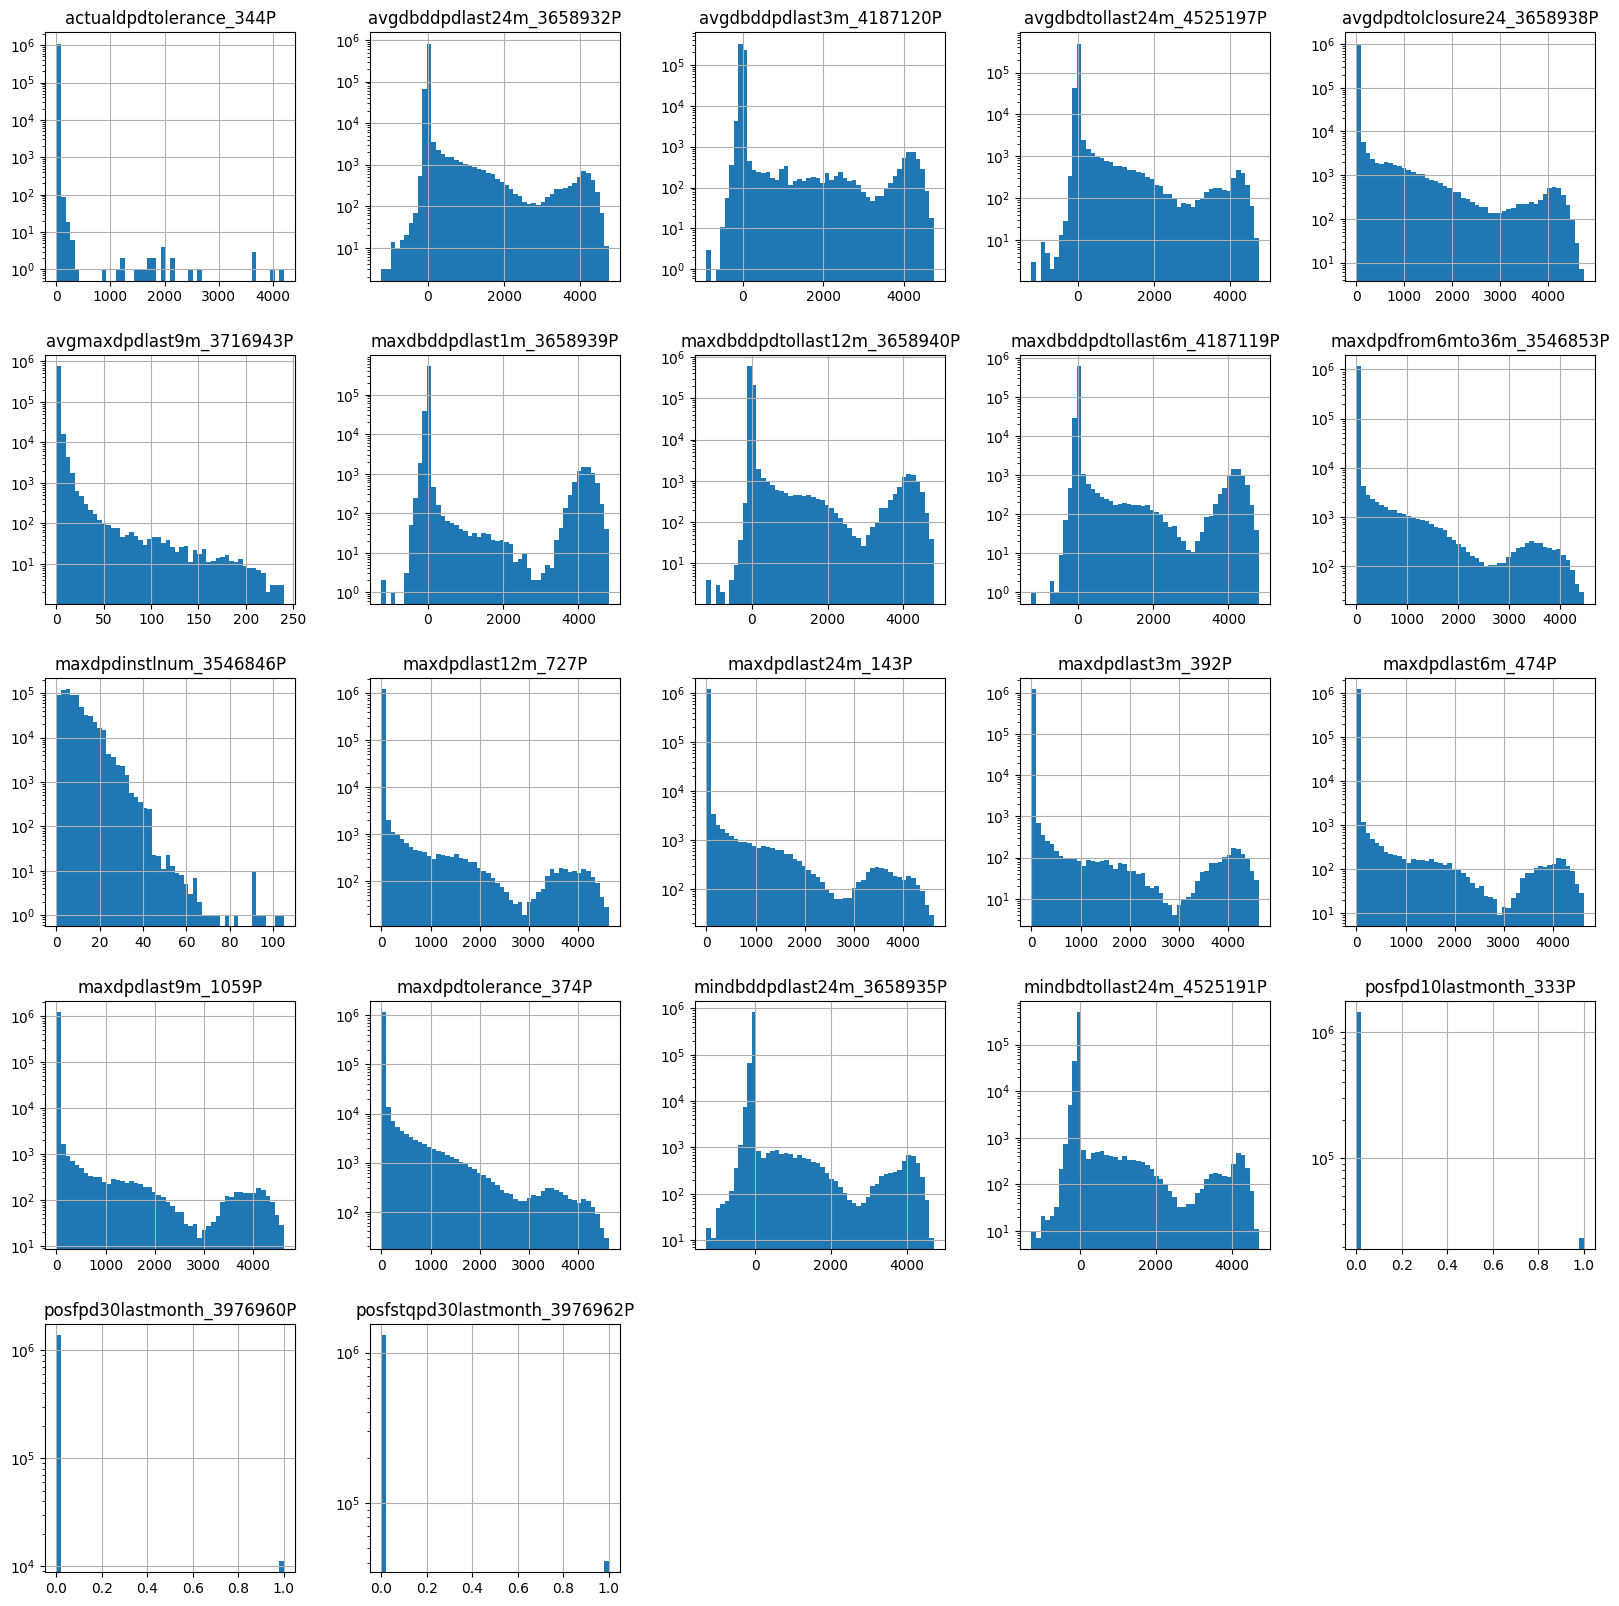

In [102]:
df_base_static[dict_categories['P']].hist(
    bins=50,
    figsize=(20, 20),
    log=True,
)
plt.show()

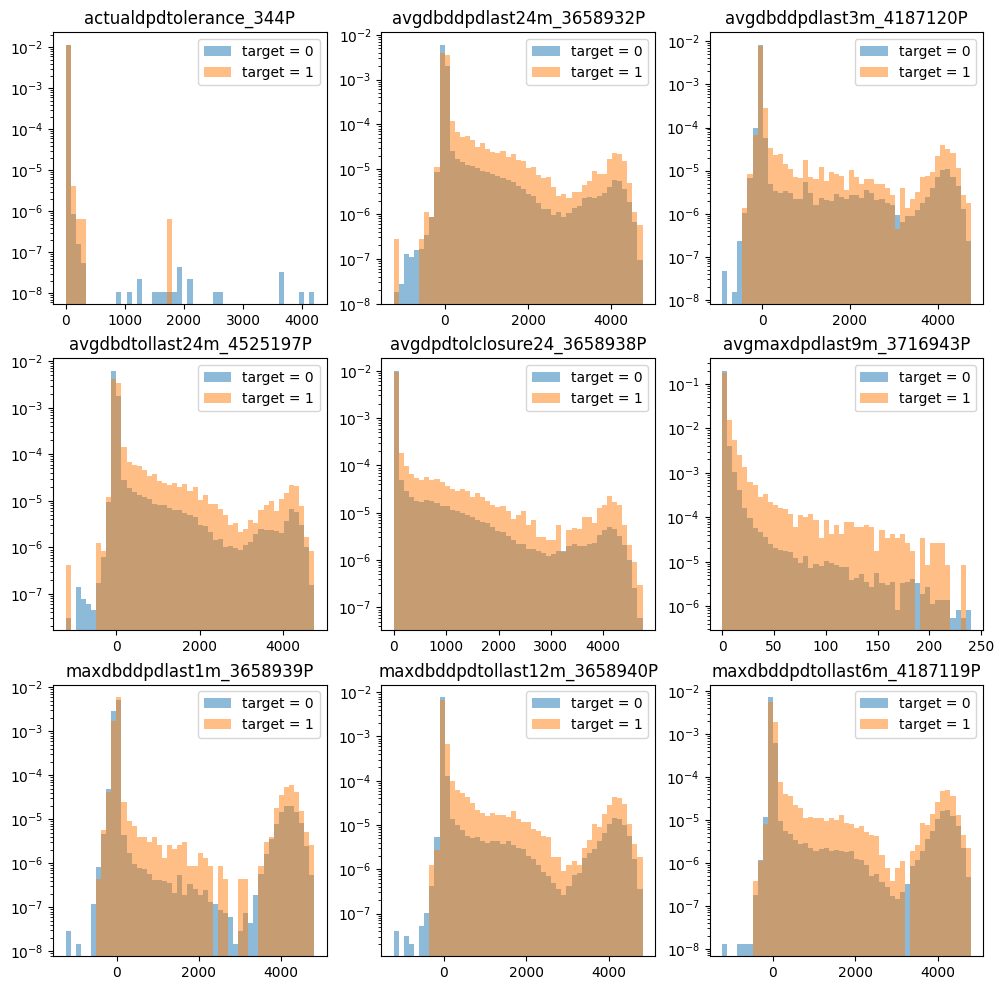

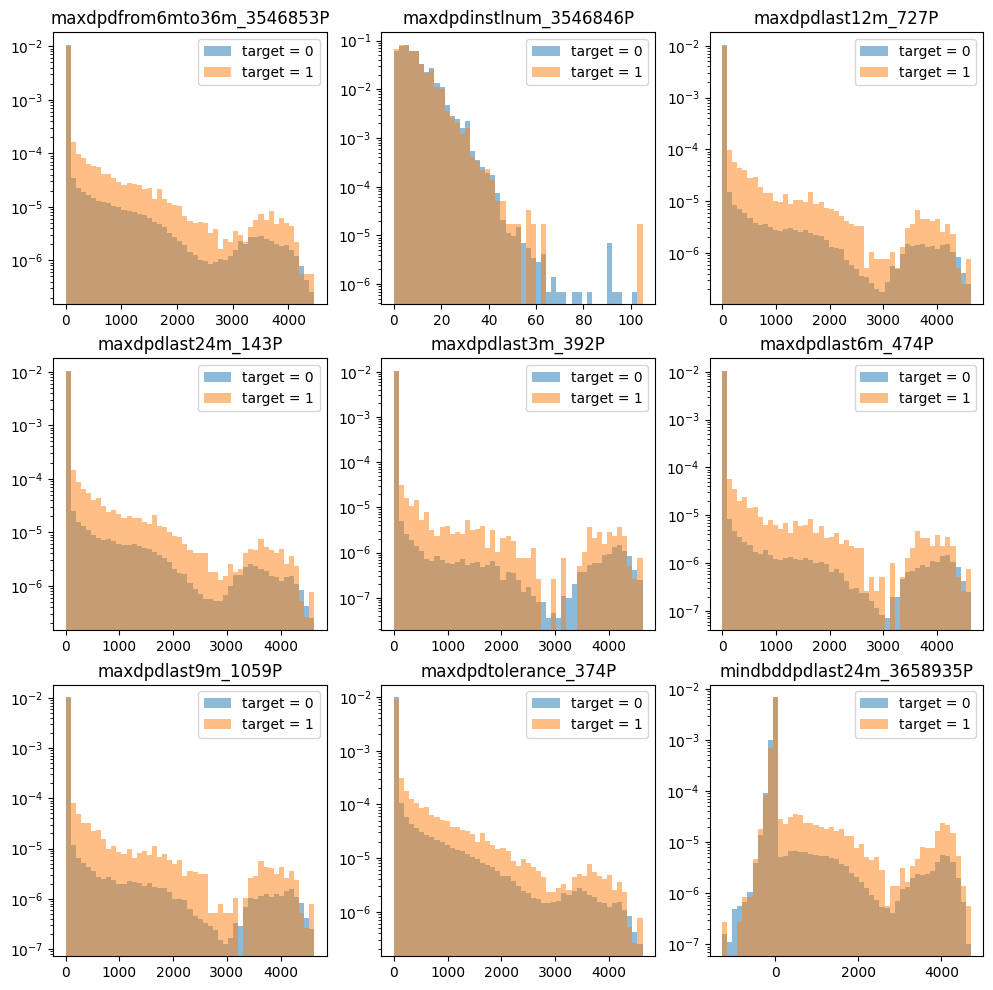

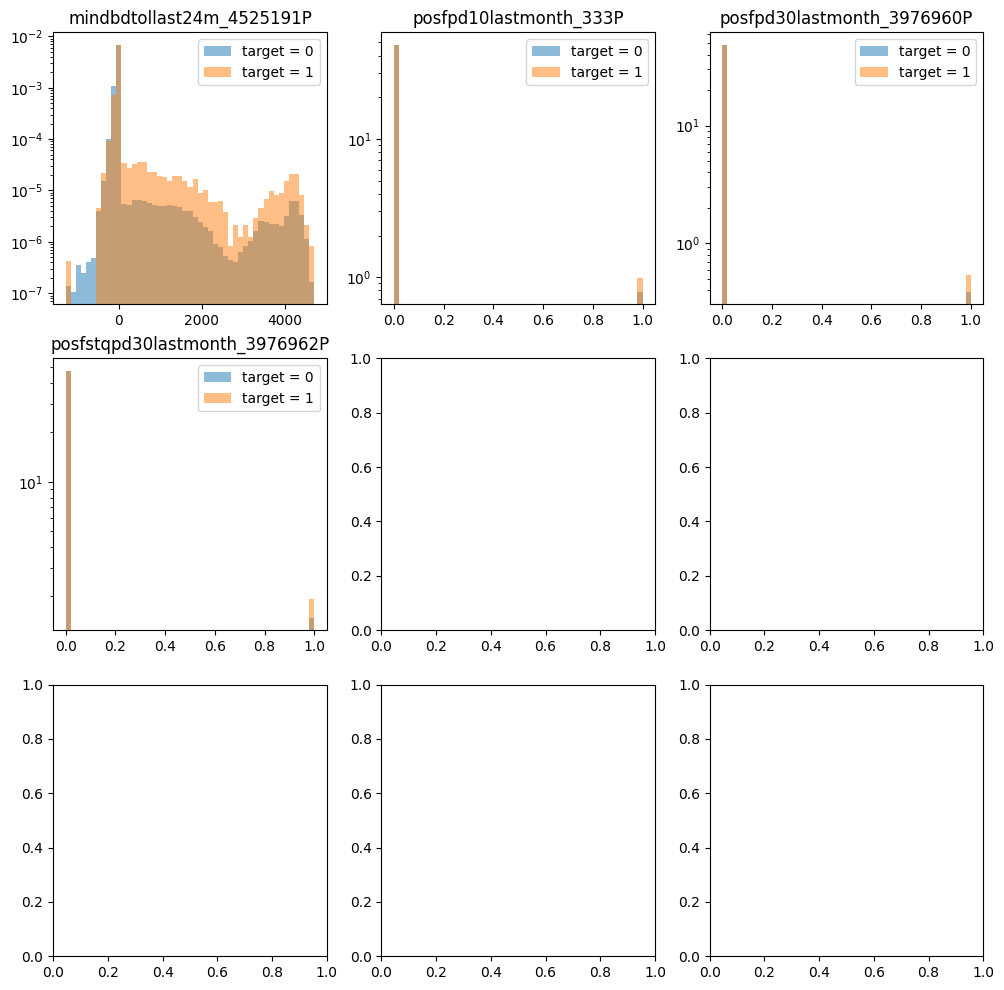

In [75]:
for ii, cat in enumerate(dict_categories['P']):
    i = ii % (3 * 3)
    if i == 0:
        fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    bins = np.linspace(df_base_static[cat].min(), df_base_static[cat].max(), 50)
    ax[i // 3, i % 3].hist(df_base_static.query('target == 0')[cat], bins=bins, alpha=0.5, label='target = 0', density=True)
    ax[i // 3, i % 3].hist(df_base_static.query('target == 1')[cat], bins=bins, alpha=0.5, label='target = 1', density=True)
    ax[i // 3, i % 3].set_title(cat)
    ax[i // 3, i % 3].legend()
    ax[i // 3, i % 3].set_yscale('log')
    if i == 8:
        plt.show()

## M: Masking categories

In [81]:
display(df_base_static[dict_categories['M']].describe())

,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M
count,1526659,1526659,1526659,1526659,1526659,1526659,1526659,1526659
unique,45,214,74,45,187,18,14,223
top,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1,a55475b1
freq,852246,1503657,1074053,1215985,1513847,953655,975347,488428


/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


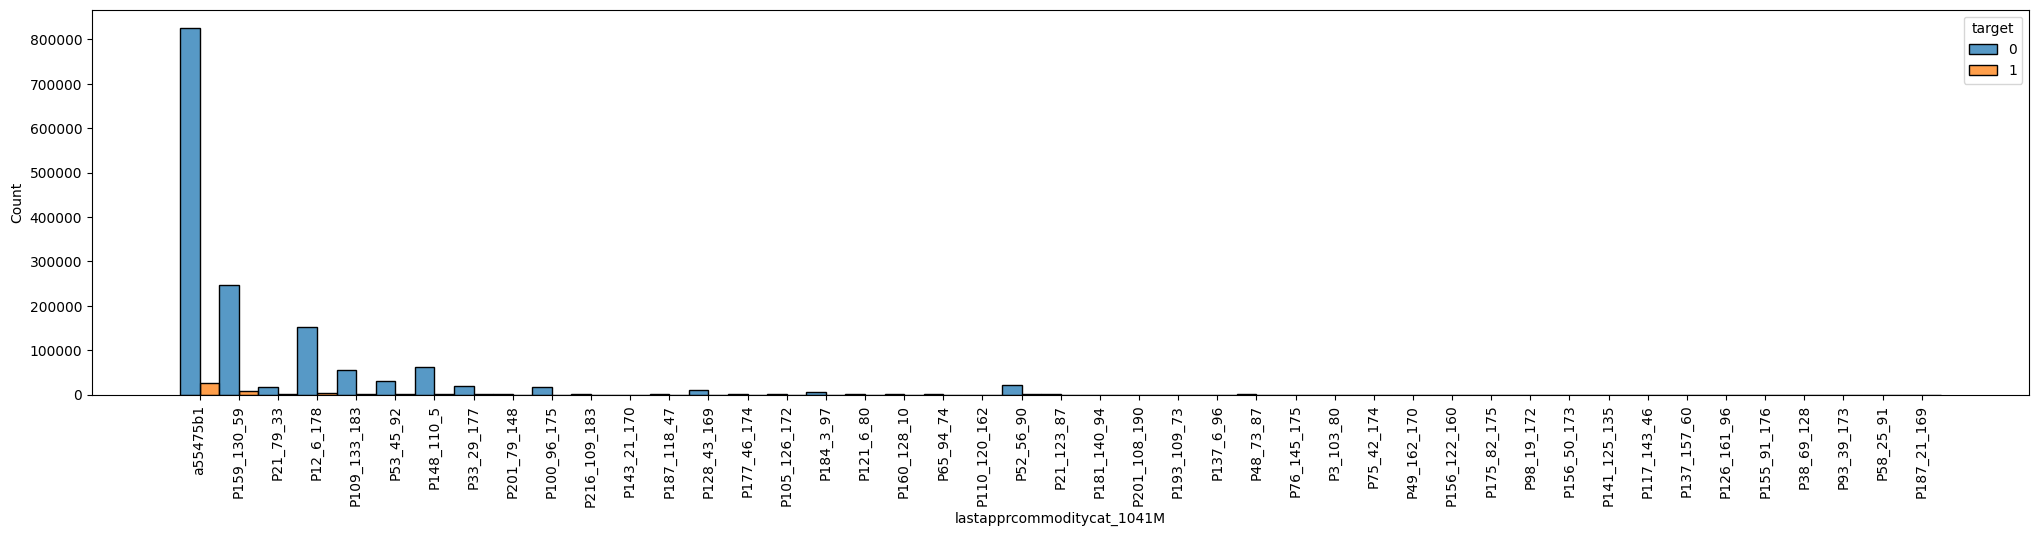

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


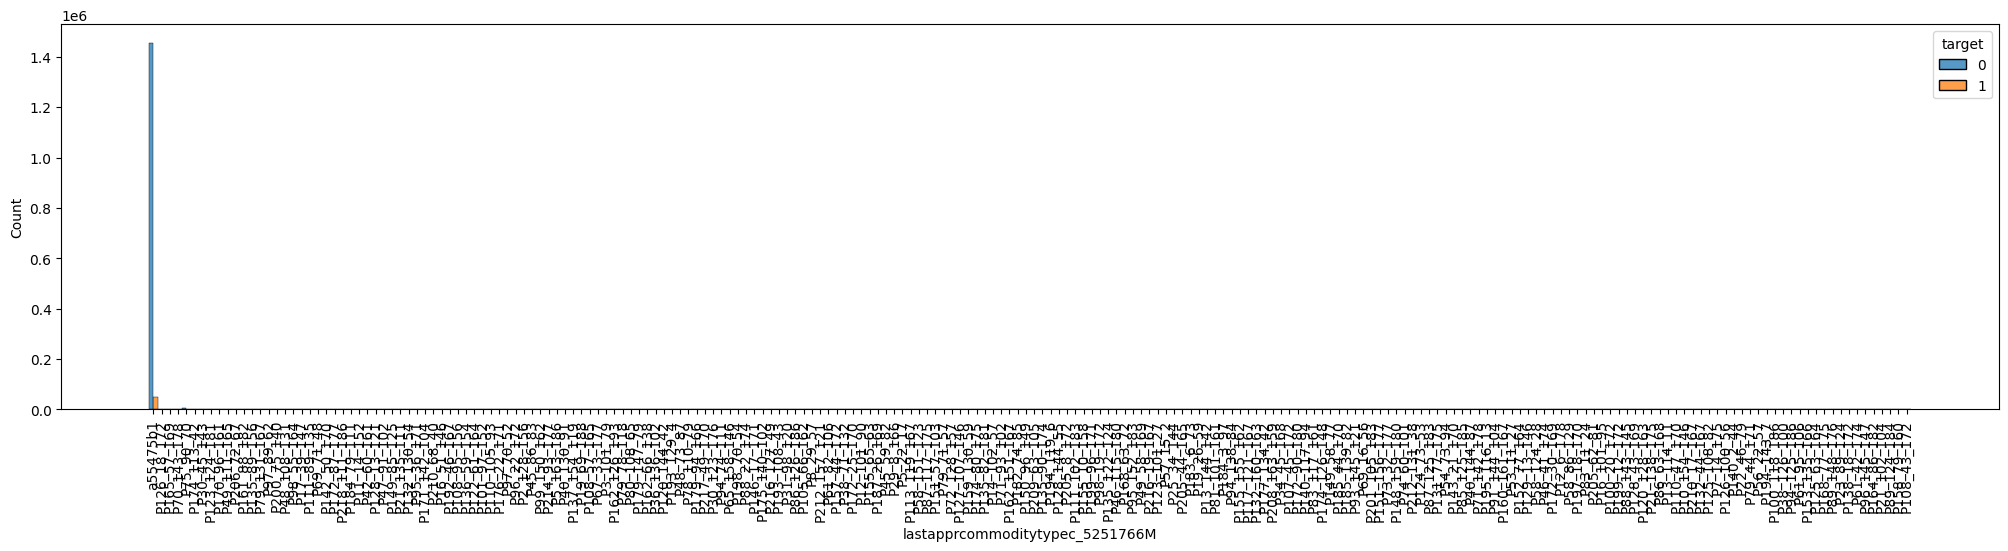

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


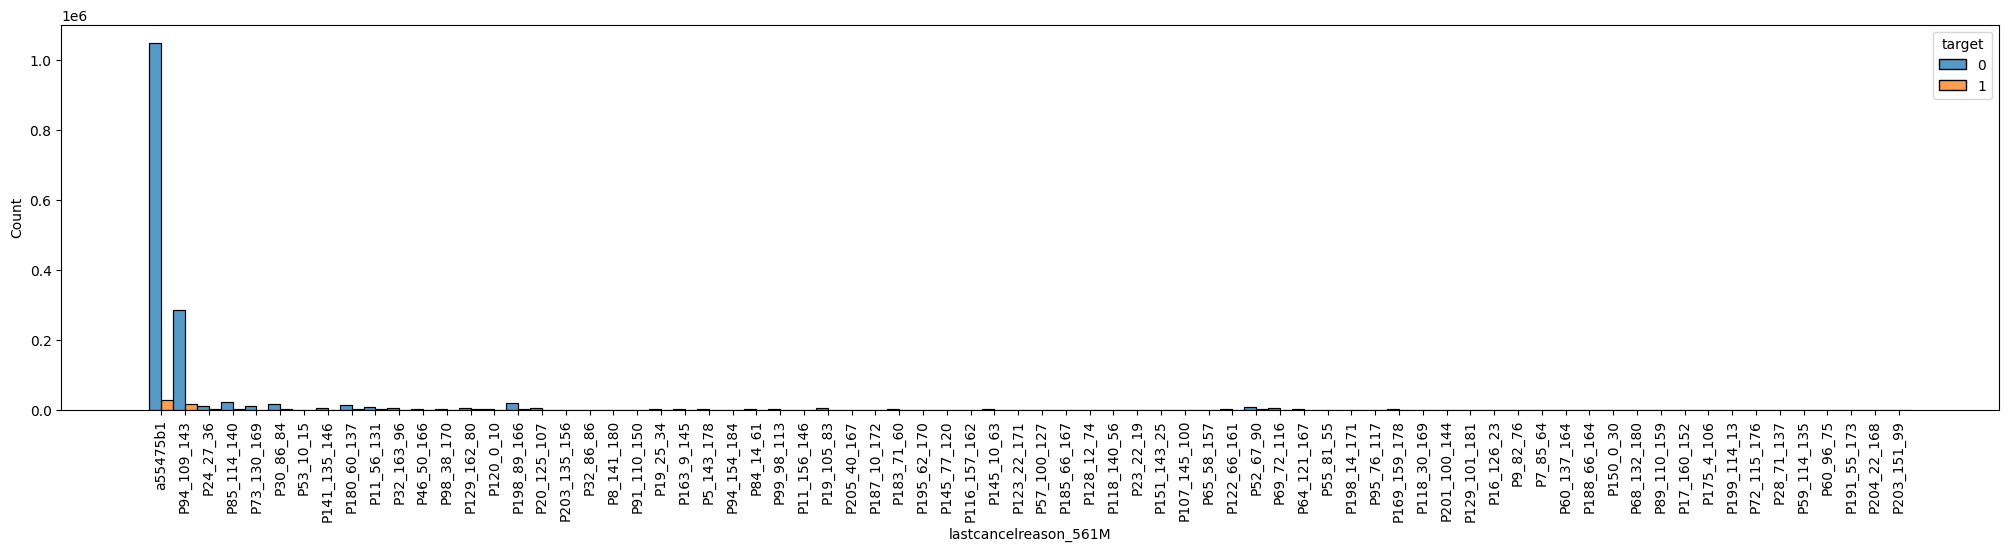

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


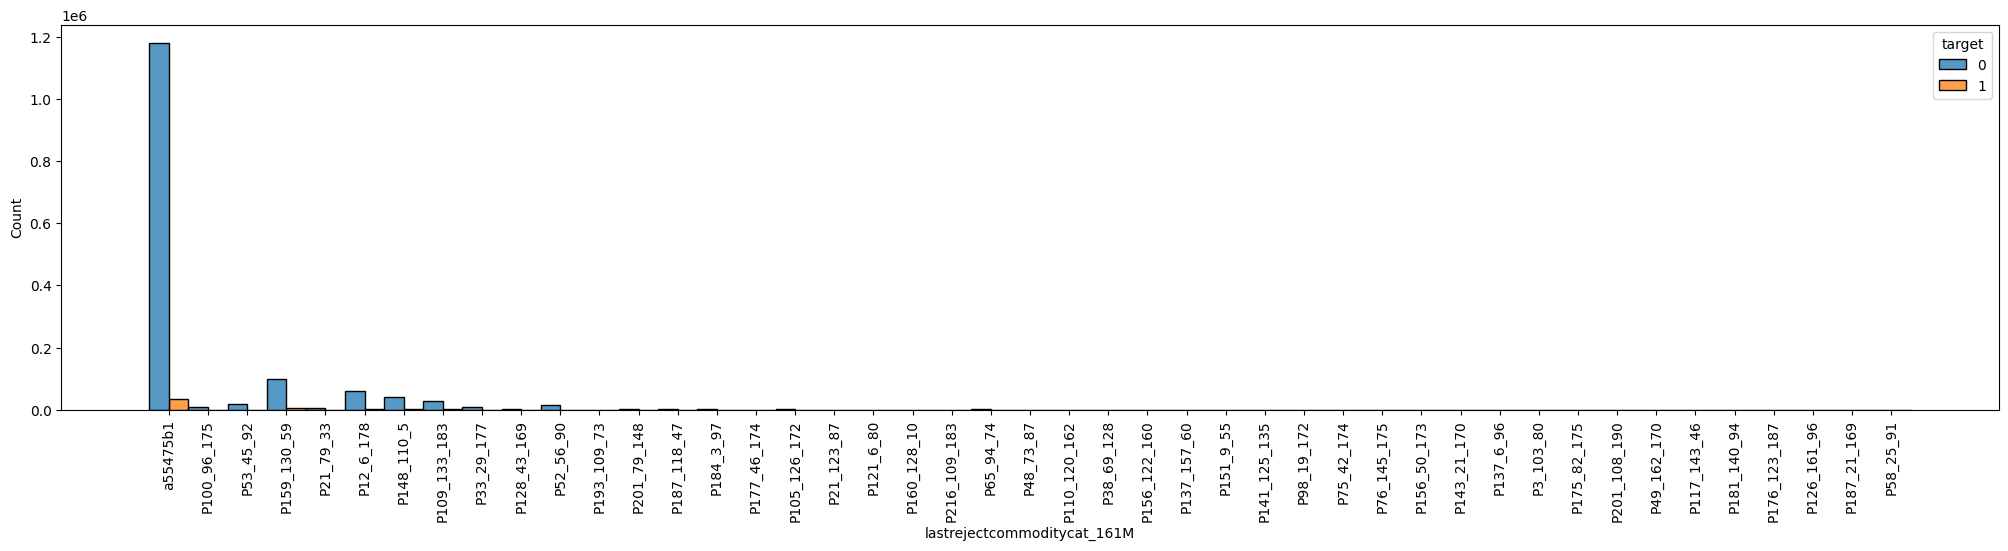

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


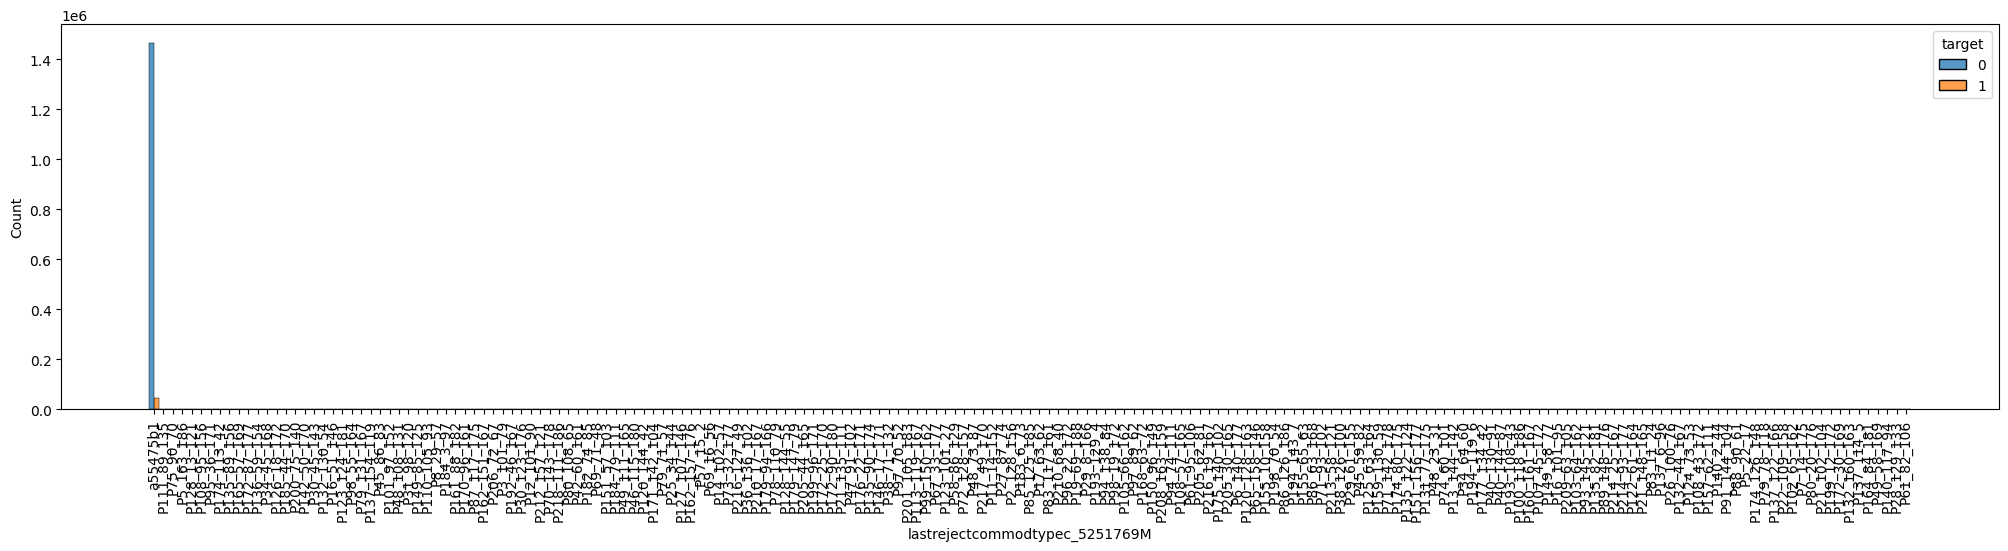

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


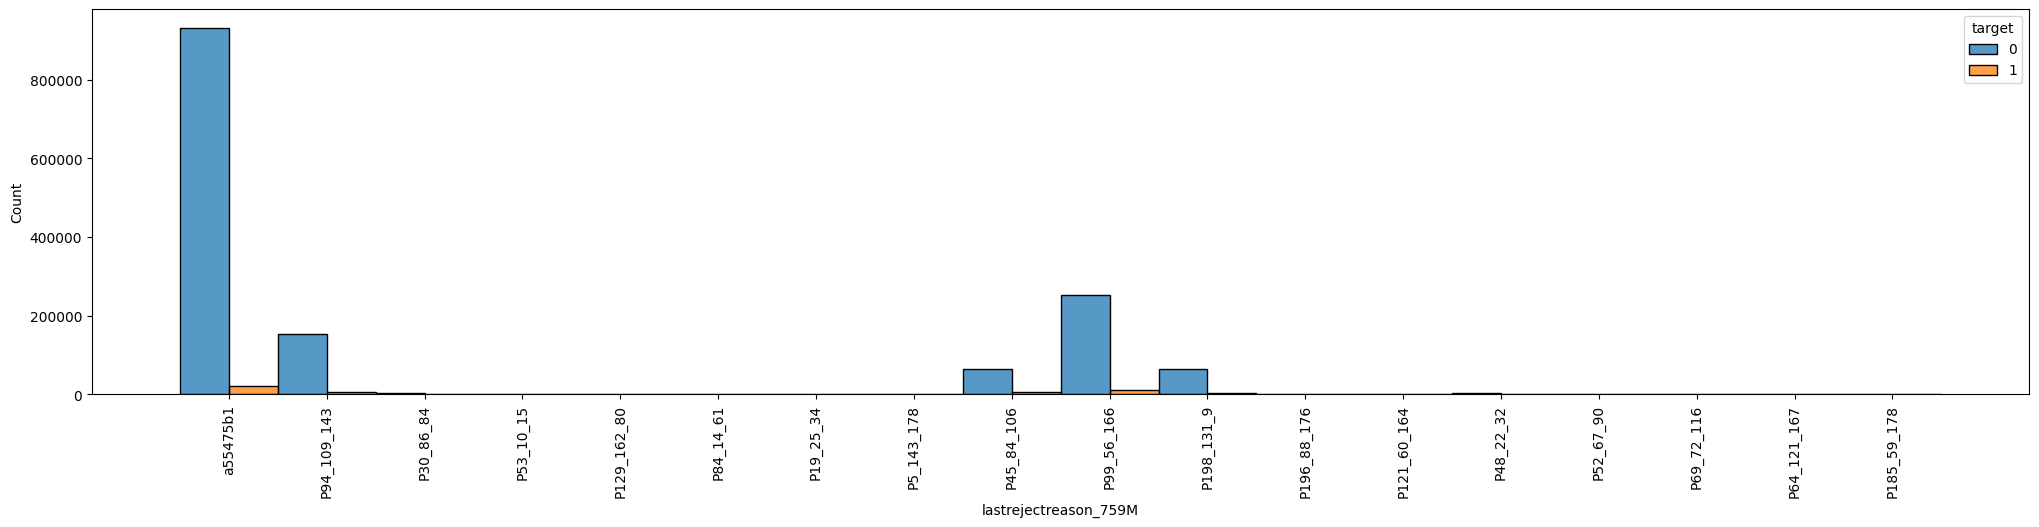

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


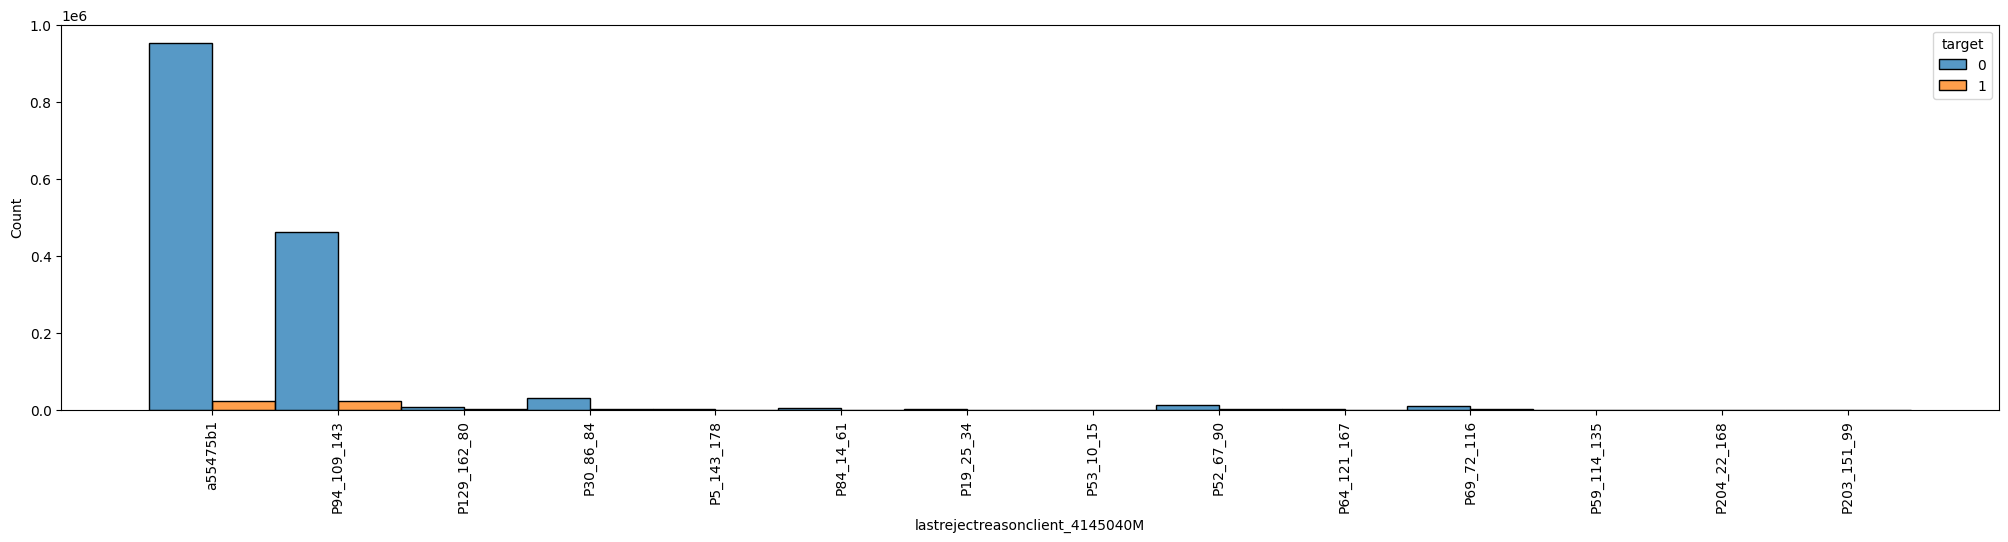

/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/kaggle/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


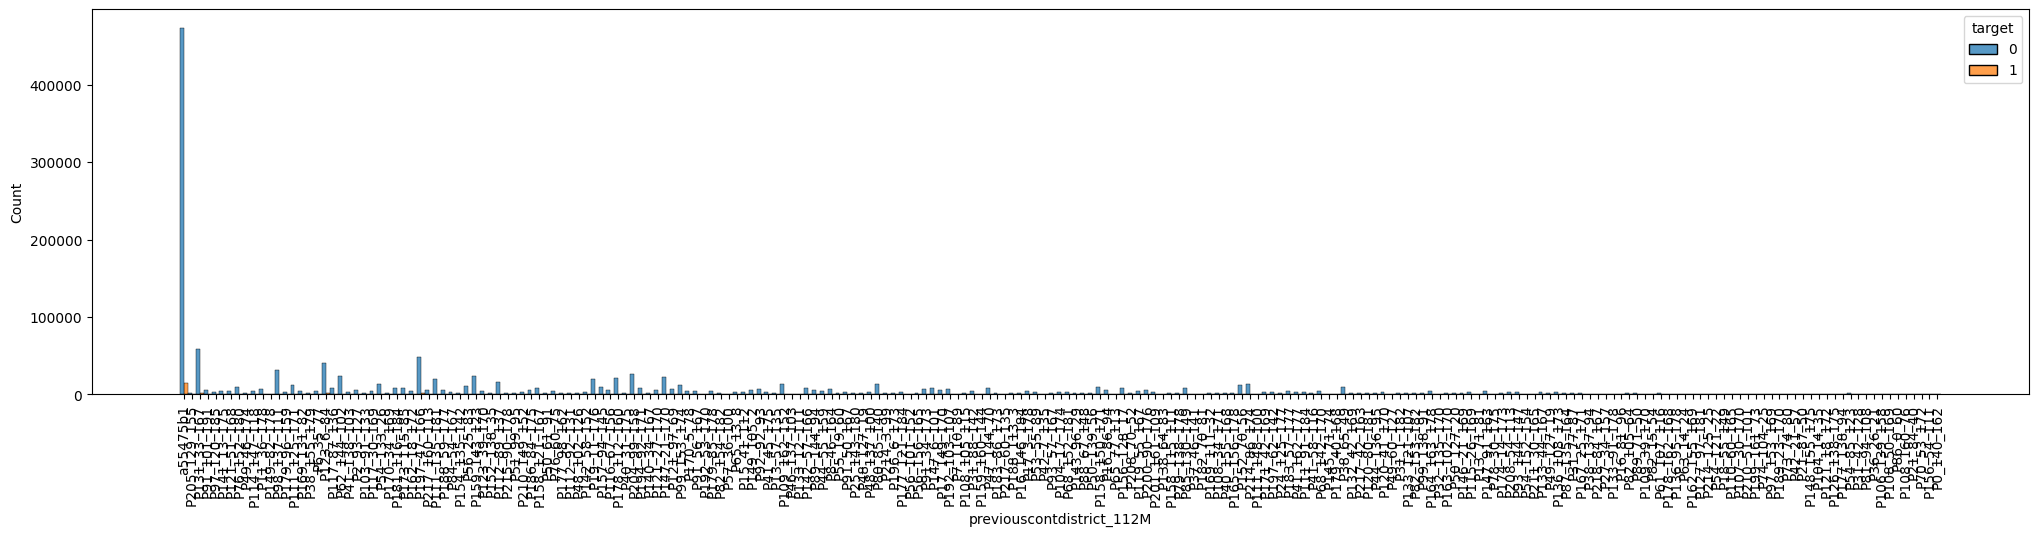

In [95]:
for cat in dict_categories['M']:
    plt.figure(figsize=(25, 5))
    g = sns.histplot(x=cat, data=df_base_static, hue='target', multiple='dodge')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.show()